# Chained Visualizations with Yellowbrick Pipelines

In Yellowbrick, `VisualPipelines` are modeled on Scikit-Learn `Pipelines`, which allow us to chain estimators together in a sane way and use them as a single estimator. This is very useful for models that require a series of extraction, normalization, and transformation steps in advance of prediction. For more about Scikit-Learn Pipelines, check out [this post](http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html) by Zac Stewart.

`VisualPipelines` sequentially apply a list of transforms, visualizers, and a final estimator which may be evaluated by additional visualizers. Intermediate steps of the pipeline must be kinds of 'transforms', that is, they must implement `fit` and `transform` methods. The final estimator only needs to implement `fit`.

Any step that implements draw or show methods can be called sequentially directly from the VisualPipeline, allowing multiple visual diagnostics to be generated, displayed, and saved on demand. If `draw` or `show` is not called, the visual pipeline should be equivalent to the simple pipeline to ensure no reduction in performance.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. These steps can be visually diagnosed by visualizers at every point in the pipeline.

In [1]:
%matplotlib inline

import os
import sys 

# Modify the path 
sys.path.append("/Users/rebeccabilbro/Desktop/waves/stuff/yellowbrick")

import requests
import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt

## Fetching the data

In [2]:
## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}


def load_data(name, download=False):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

In [3]:
# Load the classification data set
data = load_data('credit') 

In [4]:
# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

classes = ['default', 'paid']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

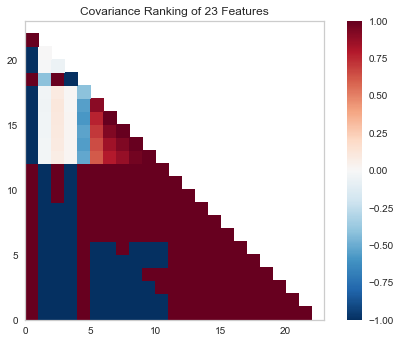

In [5]:
from yellowbrick.features.rankd import Rank2D 

visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

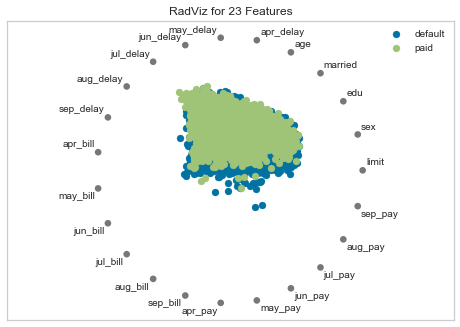

In [6]:
from yellowbrick.features.radviz import RadViz

visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

## Ok now try with `VisualPipeline`

In [7]:
from yellowbrick.pipeline import VisualPipeline

from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz


multivisualizer = VisualPipeline([
    ('rank2d', Rank2D(features=features, algorithm='covariance')), 
    ('radviz', RadViz(classes=classes, features=features)),
])

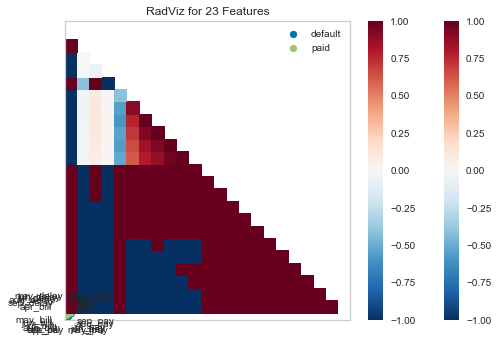

In [8]:
multivisualizer.fit(X, y)
multivisualizer.transform(X)
multivisualizer.show()